# Regression Project Template
1. Prepare Problem:
   *  Load libraries
   *  Load dataset
2. Summarize Data
   *  Descriptive statistics
       * peek at the data
       * dimensions of the data
       * data type for each attribute (need to convert str to float if required)
       * Count, mean, max, min, std dev, 25th, 50th, and 75th percentile
       * class distribution (if classification)
       * correlations of attributes in the data
       * skewness (normal or not), can use skew() function in pandas lib
   *  Data visualizations
       * Univariate plots (histograms, density plots, box and whisker plots)
       * Multivariate plots (correlation matrix plot, scatter plot matrix)
3. Prepare Data
   *  Data Cleaning
       * check for issues in data (wrong data, missing values, data integrity issues)
   *  Feature Selection
       * Univariate selection (selctKbest and chi-squared or f-values).
       * RFE (recursive feature elimination) works by recursively removing attributes and
            building a model on those attributes that remain.
       * PCA
   *  Data Transforms
       * Rescale data (data of varying scales when using distance measures such as knn). You can use minmaxscaler, standardscaler, normalizer). All of them are under sklern.preprocessing
       * you may also want to use binarizer for some features. Say you have a probability feature and you want to turn it into 1/0 values. you can use preprocessing.binarizer for this.
4. Evaluate Algorithms
   *  Split-out validation dataset
       * train and test sets
       * use k-fold cross validation where ever possible.
           * if you are using a time consuming algorithm or a huge dataset, use smaller k's
           * use both mean and sd/CI
   *  Test options and evaluation metric
       * Regression ( Mean squared error, mean absolute error, R^2) (see example below)
   *  Spot Check Algorithms
       * quick way to check which algorithms work well for your problem
   *  Compare Algorithms
       * Comparing different algorithms in a consistent way is important (see examples for both classification and regression problems)
5. Improve Accuracy
   *  Algorithm Tuning
       * Use pipelines.. saves a lot of time!
   *  Ensembles
6. Finalize Model
   *  Predictions on validation dataset
   *  Create standalone model on entire training dataset
   *  Save model for later use

# 1. Prepare Problem:
### 1.1 Load libraries


In [51]:
# Load libraries
# Load libraries
import numpy
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

### 1.2 Load dataset

In [6]:
# Load dataset
# Load dataset
filename = './data/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = read_csv(filename, delim_whitespace=True, names=names)

# 2. Summarize Data
## 2.1 Descriptive statistics
### 2.1.1 peek at the data


In [9]:
# head
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 2.1.2 dimensions of the data

In [10]:
# shape
dataset.shape

(506, 14)

### 2.1.3 Data type for each attribute (need to convert str to float if required)

In [11]:
# show dtypes
dataset.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 2.1.4 Count, mean, max, min, std dev, 25th, 50th, and 75th percentile

In [20]:
# set precision and describe
pd.set_option('display.precision', 1)
dataset.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


### 2.1.5 Correlations of attributes in the data.

In [21]:
# set precision and correlate
set_option('display.precision', 2)
dataset.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


### 2.1.5 Show skewness (normal or not), can use skew() function in pandas lib.

In [27]:
# show skewness using .skew() method
dataset.skew()


CRIM       5.22
ZN         2.23
INDUS      0.30
CHAS       3.41
NOX        0.73
RM         0.40
AGE       -0.60
DIS        1.01
RAD        1.00
TAX        0.67
PTRATIO   -0.80
B         -2.89
LSTAT      0.91
MEDV       1.11
dtype: float64

## 2.2 Data visualizations
### 2.2.1 Univariate - Histograms

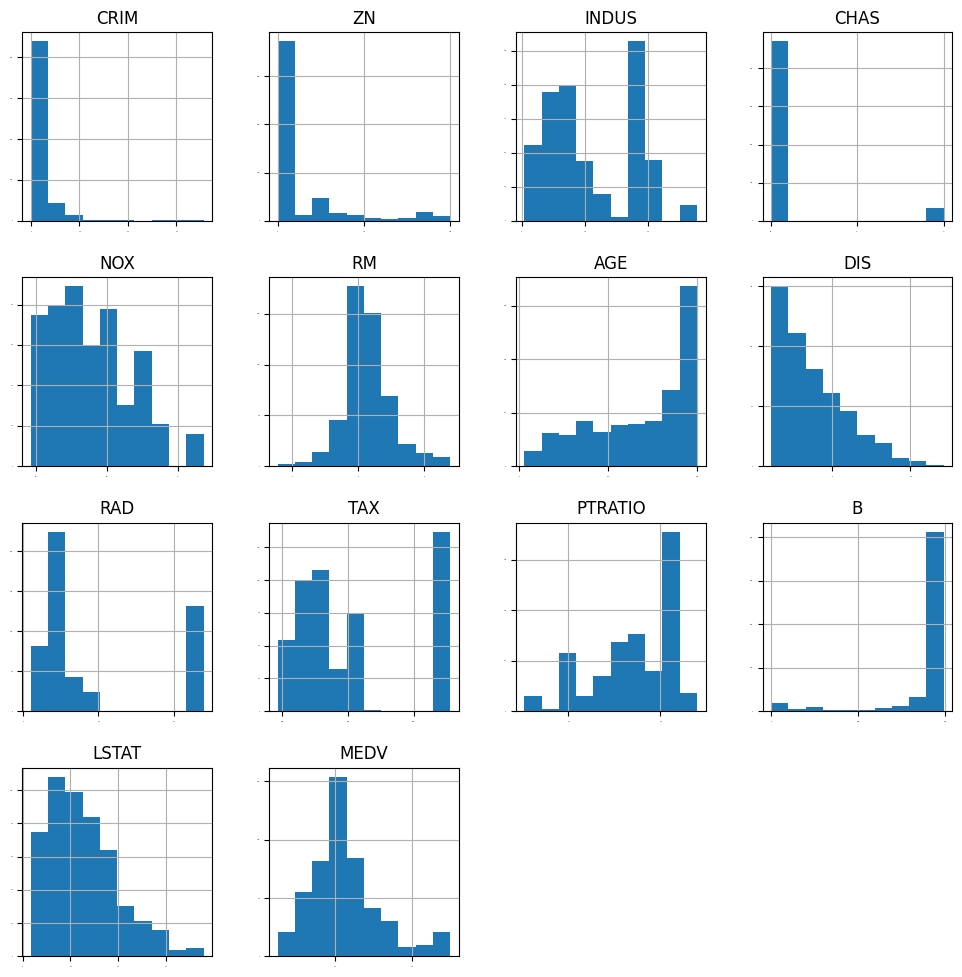

In [26]:
# example histogram using .hist() method
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

### 2.2.2 Univariate - Density Plots

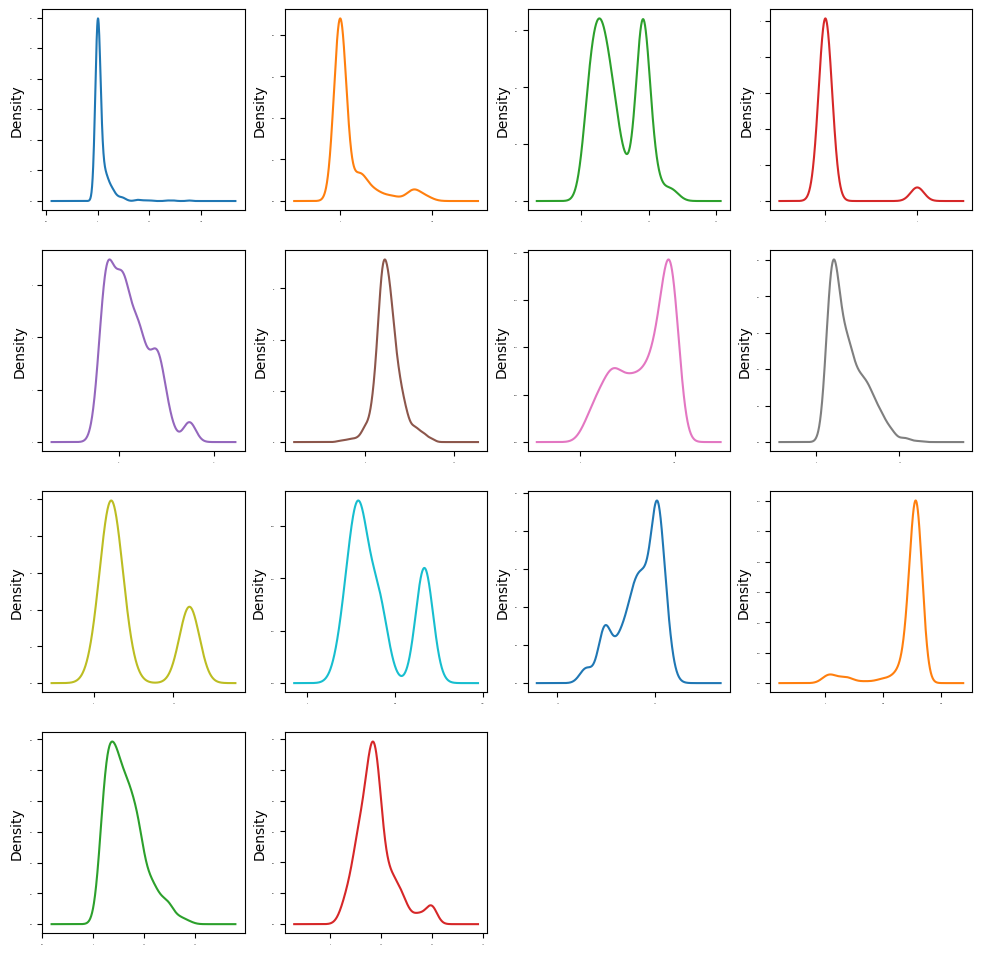

In [28]:
# example density plot
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False,
fontsize=1, figsize=(12,12))
plt.show()

### 2.2.3 Univariate - Box and Whisker Plots

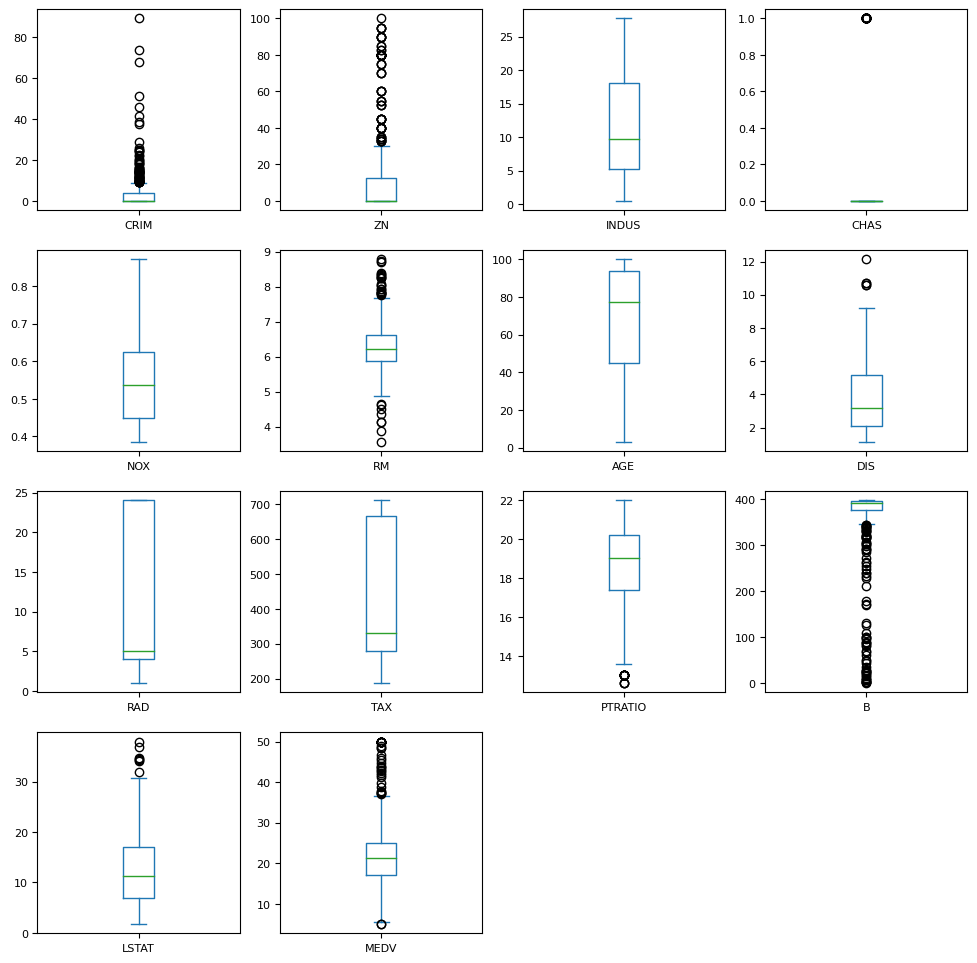

In [29]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
fontsize=8, figsize=(12,12))
plt.show()

### 2.2.4 Multivariate - Scatter Plot Matrix

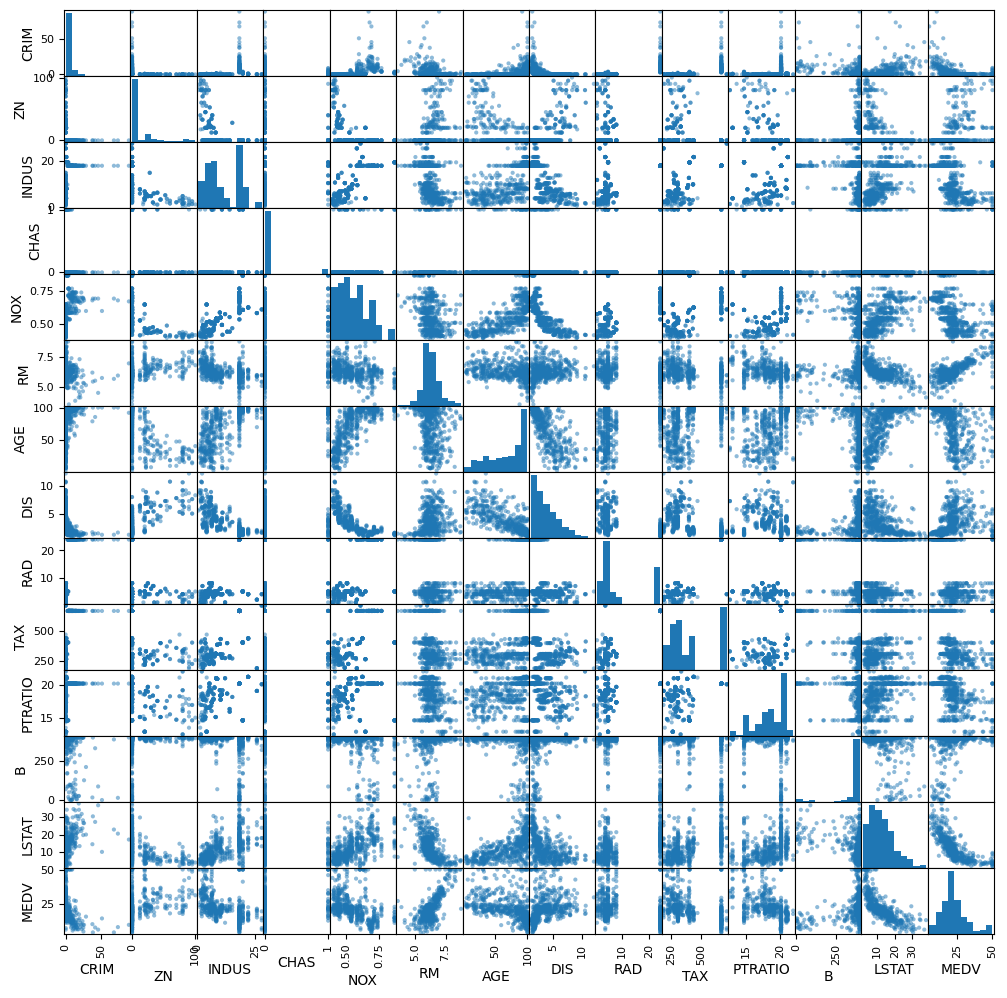

In [30]:
# example scatter plot matrix
scatter_matrix(dataset, figsize=(12,12))
plt.show()

### 2.2.5 Correlation Matrix Plot

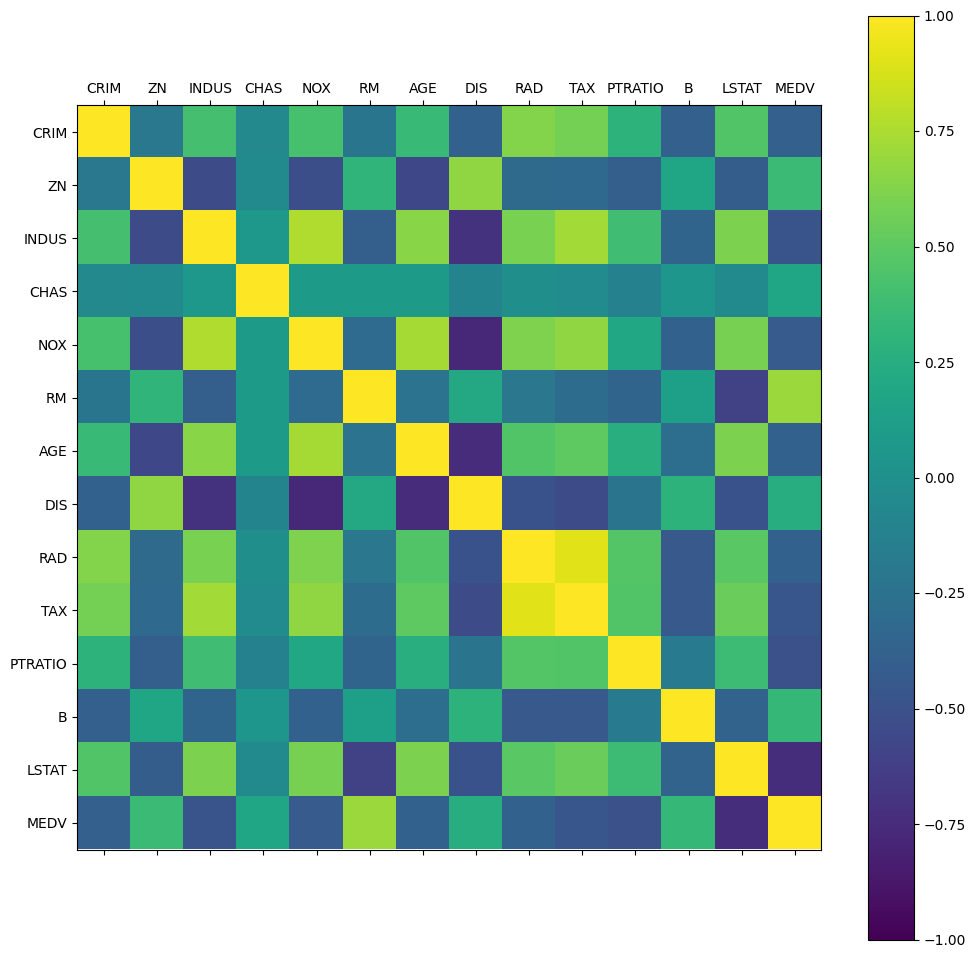

In [32]:
# example correlation matrix
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

# 3. Prepare Data
## 3.1  Data Cleaning
### 3.1.1 Check for issues in data (wrong data, missing values, data integrity issues)

## 3.2  Feature Selection
### 3.2.1 Univariate selection (selctKbest and chi-squared or f-values). See the example below.


### 3.2.2 RFE (recursive feature elimination) works by recursively removing attributes and building a model on those attributes that remain.

### 3.2.3 PCA

## 3.4  Data Transforms
### 3.4.1 Rescale data (data of varying scales when using distance measures such as knn). You can use minmaxscaler, standardscaler, normalizer). All of them are under sklern.preprocessing

# 4. Evaluate Algorithms
## 4.1  Split-out validation dataset
### 4.1.1 Create train/test splits and set options

In [35]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [59]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

### 4.1.2 Use k-fold cross validation whereever possible.
* if you are using a time consuming algorithm or a huge dataset, use smaller k's
* use both mean and sd/CI

In [60]:
# Instantiate algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR(gamma='auto')))

In [68]:
# Evaluate each model using K-fold cross validation in turn.
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

## 4.2  Spot check and compare baseline evaluation metrics.
* Comparing different algorithms in a consistent way is important

### 4.2.1 Visualize MSE, MAE, and R squared.

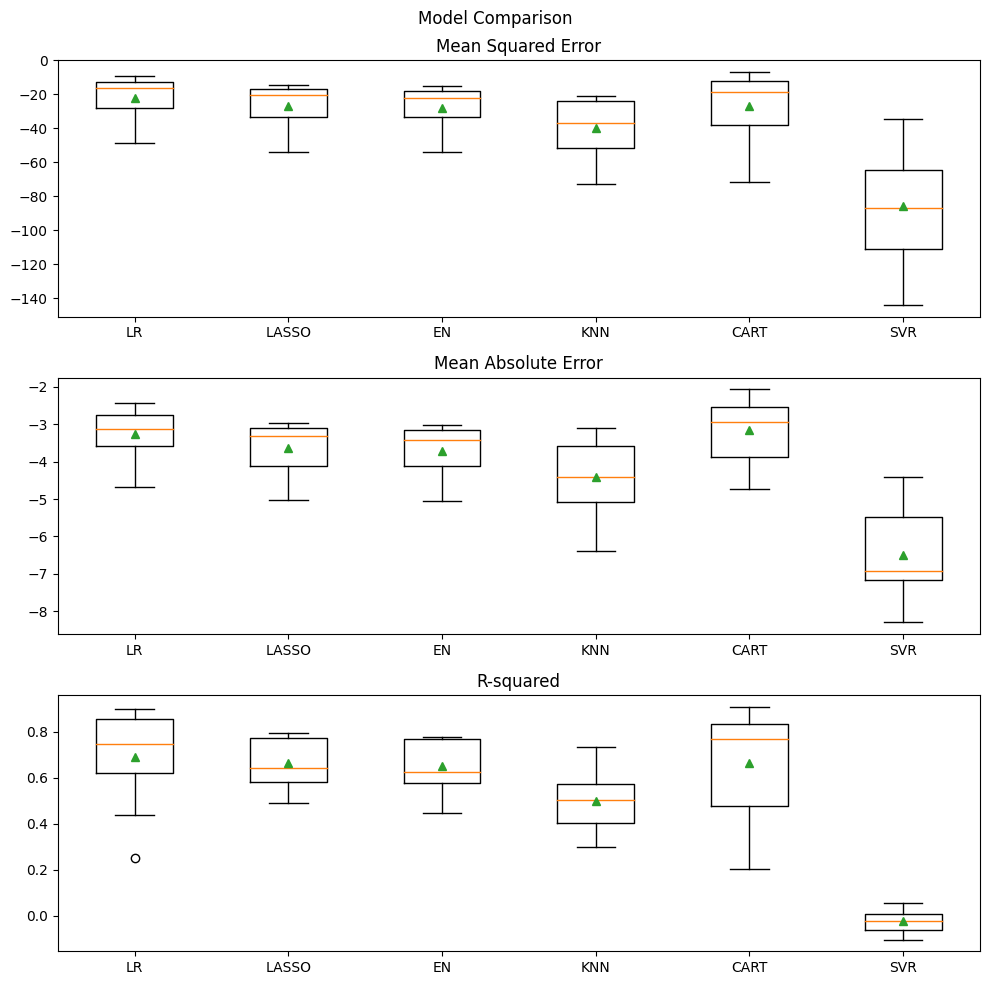

In [73]:
# Compare Algorithms
fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle('Model Comparison')
axs[0].boxplot([results[i]['test_neg_mean_squared_error'] for i in range(len(names))], labels=names, showmeans=True)
axs[0].set_title('Mean Squared Error')
axs[1].boxplot([results[i]['test_neg_mean_absolute_error'] for i in range(len(names))], labels=names, showmeans=True)
axs[1].set_title('Mean Absolute Error')
axs[2].boxplot([results[i]['test_r2'] for i in range(len(names))], labels=names, showmeans=True)
axs[2].set_title('R-squared')

fig.tight_layout()
    
plt.show()

# 5. Improve Accuracy
## 5.1  Algorithm Tuning
### 5.1.1 Use pipelines and kfold.. saves a lot of time!

In [79]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)

### 5.1.2 Visualize MSE, MAE, and R squared.

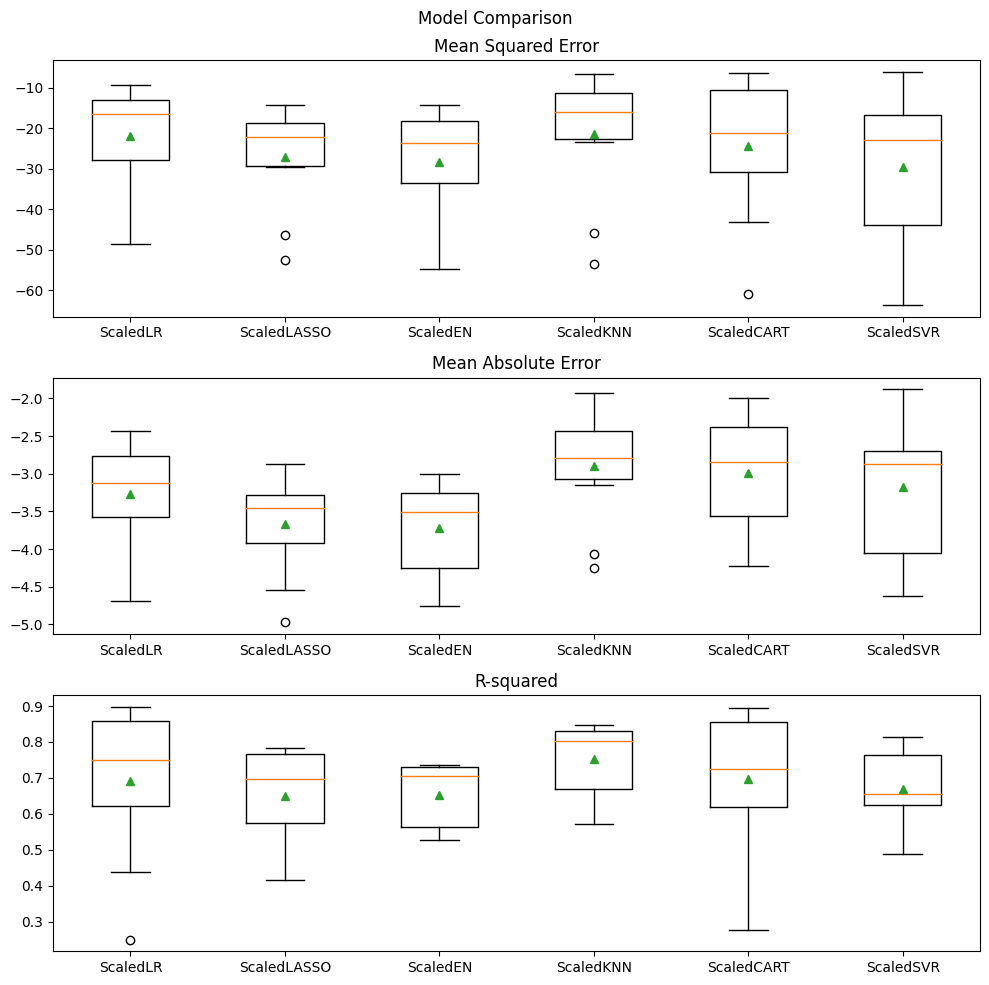

In [80]:
# Compare Algorithms
fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle('Model Comparison')
axs[0].boxplot([results[i]['test_neg_mean_squared_error'] for i in range(len(names))], labels=names, showmeans=True)
axs[0].set_title('Mean Squared Error')
axs[1].boxplot([results[i]['test_neg_mean_absolute_error'] for i in range(len(names))], labels=names, showmeans=True)
axs[1].set_title('Mean Absolute Error')
axs[2].boxplot([results[i]['test_r2'] for i in range(len(names))], labels=names, showmeans=True)
axs[2].set_title('R-squared')

fig.tight_layout()
    
plt.show()

### 5.1.3 Individual Model Tuning

In [87]:
# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [89]:
# Print KNN grid search results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
for scorer in scoring:
    print("Evaluation metric:", scorer)
    means = grid_result.cv_results_['mean_test_' + scorer]
    stds = grid_result.cv_results_['std_test_' + scorer]
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: -19.497829 using {'n_neighbors': 1}
Evaluation metric: neg_mean_squared_error
-19.497829 (15.769847) with: {'n_neighbors': 1}
-19.977984 (13.803973) with: {'n_neighbors': 3}
-21.270967 (14.833544) with: {'n_neighbors': 5}
-21.577292 (14.952592) with: {'n_neighbors': 7}
-21.001075 (14.701297) with: {'n_neighbors': 9}
-21.490306 (14.866957) with: {'n_neighbors': 11}
-21.268533 (14.454969) with: {'n_neighbors': 13}
-21.968092 (14.209894) with: {'n_neighbors': 15}
-22.739880 (14.492752) with: {'n_neighbors': 17}
-23.506901 (14.903224) with: {'n_neighbors': 19}
-24.240303 (15.156565) with: {'n_neighbors': 21}
Evaluation metric: neg_mean_absolute_error
-2.741677 (0.678713) with: {'n_neighbors': 1}
-2.852010 (0.754803) with: {'n_neighbors': 3}
-2.874421 (0.704593) with: {'n_neighbors': 5}
-2.935909 (0.705426) with: {'n_neighbors': 7}
-2.921407 (0.725314) with: {'n_neighbors': 9}
-2.981422 (0.759559) with: {'n_neighbors': 11}
-2.989770 (0.738908) with: {'n_neighbors': 13}
-3.078353 (0.70

## 5.2 Ensemble methods
### 5.2.1 Use pipelines and kfold.. saves a lot of time!
* If you are using a time consuming algorithm or a huge dataset, use smaller k's

In [93]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)


### 5.2.2 Visualize MSE, MAE, and R squared.

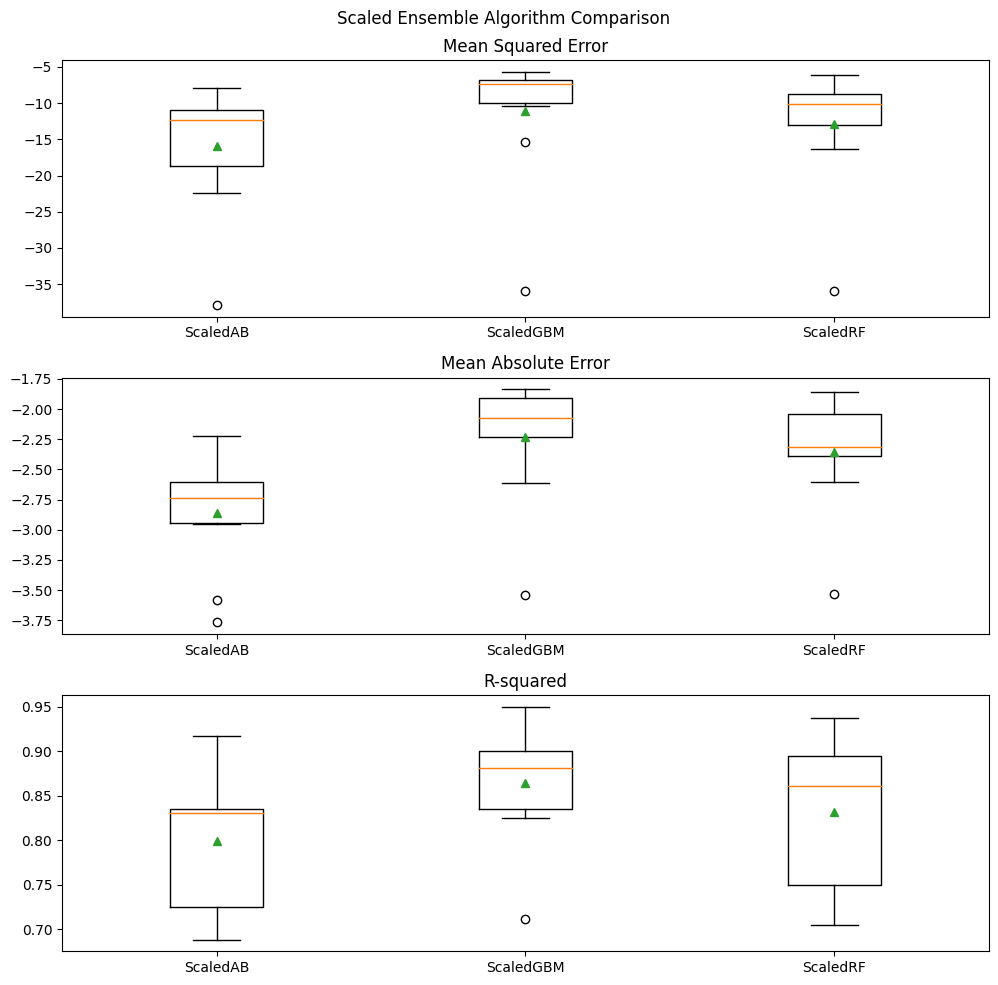

In [94]:
# Compare Algorithms
# Compare Algorithms
fig, axs = plt.subplots(3, figsize=(10,10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
axs[0].boxplot([results[i]['test_neg_mean_squared_error'] for i in range(len(names))], labels=names, showmeans=True)
axs[0].set_title('Mean Squared Error')
axs[1].boxplot([results[i]['test_neg_mean_absolute_error'] for i in range(len(names))], labels=names, showmeans=True)
axs[1].set_title('Mean Absolute Error')
axs[2].boxplot([results[i]['test_r2'] for i in range(len(names))], labels=names, showmeans=True)
axs[2].set_title('R-squared')

fig.tight_layout()
    
plt.show()

### 5.2.3 Individual Ensemble Model Tuning

In [98]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring,refit='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [99]:
# Print GBM grid search results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    
for scorer in scoring:
    print("Evaluation metric:", scorer)
    means = grid_result.cv_results_['mean_test_' + scorer]
    stds = grid_result.cv_results_['std_test_' + scorer]
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

Best: -10.560638 using {'n_estimators': 400}
Evaluation metric: neg_mean_squared_error
-11.629999 (8.833221) with: {'n_estimators': 50}
-11.073455 (8.772155) with: {'n_estimators': 100}
-10.838924 (8.734377) with: {'n_estimators': 150}
-10.785568 (8.657244) with: {'n_estimators': 200}
-10.654778 (8.540552) with: {'n_estimators': 250}
-10.649385 (8.497232) with: {'n_estimators': 300}
-10.589337 (8.413596) with: {'n_estimators': 350}
-10.560638 (8.353747) with: {'n_estimators': 400}
Evaluation metric: neg_mean_absolute_error
-2.300111 (0.500615) with: {'n_estimators': 50}
-2.222001 (0.493826) with: {'n_estimators': 100}
-2.182960 (0.501003) with: {'n_estimators': 150}
-2.180132 (0.490329) with: {'n_estimators': 200}
-2.167797 (0.481593) with: {'n_estimators': 250}
-2.163037 (0.478639) with: {'n_estimators': 300}
-2.161265 (0.472804) with: {'n_estimators': 350}
-2.160079 (0.472231) with: {'n_estimators': 400}
Evaluation metric: r2
0.860858 (0.061275) with: {'n_estimators': 50}
0.866138 (0

# 6. Finalize Model
## 6.1  Predictions on validation dataset

In [100]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=400)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(n_estimators=400, random_state=7)

In [101]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

11.902132586880027


## 6.2  Create standalone model on entire training dataset

## 6.3  Save model for later use